# Пахалюк Евгений М3100
# Discrete Math Homework 5 

Для начала импортируем всё, что понадобится:

networkx для работы с графами

pandas для распаковки csv данных

random пригодится в написанных саммоу алгоритмах

matplotlib для отрисовки графов

In [1]:
import networkx as nx
import pandas as pd
from random import choice
import matplotlib.pyplot as plt
from networkx.algorithms import approximation
from networkx.algorithms.approximation import traveling_salesman

**1. The graph of Europe G\* = ⟨V , E⟩ is defined as follows: each vertex v ∈ V is a Europe country; two vertices are adjacent ({u, v} ∈ E) if the corresponding countries share a land border. Let G be the largest connected component of G\***

* (a) Draw G\* with the minimum number of intersecting edges

Создадим словарь стран и их соседей, преобразуем в nx.Graph и нарисуем без пересечений с помощью встроенной функции рисовки планарного графа.

In [2]:
graph = {'Россия': {'Белоруссия',
                    'Грузия',
                    'Латвия',
                    'Литва',
                    'Норвегия',
                    'Польша',
                    'Украина',
                    'Финляндия',
                    'Эстония'},
         'Норвегия': {'Россия', 'Финляндия', 'Швеция'},
         'Финляндия': {'Норвегия', 'Россия', 'Швеция'},
         'Швеция': {'Норвегия', 'Финляндия'},
         'Эстония': {'Латвия', 'Россия'},
         'Латвия': {'Белоруссия', 'Литва', 'Россия', 'Эстония'},
         'Белоруссия': {'Латвия', 'Литва', 'Польша', 'Россия', 'Украина'},
         'Литва': {'Белоруссия', 'Латвия', 'Польша', 'Россия'},
         'Польша': {'Белоруссия',
                    'Германия',
                    'Литва',
                    'Россия',
                    'Словакия',
                    'Украина',
                    'Чехия'},
         'Украина': {'Белоруссия',
                     'Венгрия',
                     'Молдавия',
                     'Польша',
                     'Россия',
                     'Румыния',
                     'Словакия'},
         'Молдавия': {'Румыния', 'Украина'},
         'Румыния': {'Болгария', 'Венгрия', 'Молдавия', 'Сербия', 'Украина'},
         'Болгария': {'Греция', 'Македония', 'Румыния', 'Сербия', 'Турция'},
         'Турция': {'Армения', 'Болгария', 'Греция', 'Грузия'},
         'Греция': {'Албания', 'Болгария', 'Македония', 'Турция'},
         'Албания': {'Греция', 'Косово', 'Македония', 'Черногория'},
         'Македония': {'Албания', 'Болгария', 'Греция', 'Косово', 'Сербия'},
         'Сербия': {'Болгария',
                    'Босния и Герцеговина',
                    'Венгрия',
                    'Косово',
                    'Македония',
                    'Румыния',
                    'Хорватия',
                    'Черногория'},
         'Босния и Герцеговина': {'Сербия', 'Хорватия', 'Черногория'},
         'Хорватия': {'Босния и Герцеговина',
                      'Венгрия',
                      'Сербия',
                      'Словения',
                      'Черногория'},
         'Венгрия': {'Австрия',
                     'Румыния',
                     'Сербия',
                     'Словакия',
                     'Словения',
                     'Украина',
                     'Хорватия'},
         'Словакия': {'Австрия', 'Венгрия', 'Польша', 'Украина', 'Чехия'},
         'Словения': {'Австрия', 'Венгрия', 'Италия', 'Хорватия'},
         'Австрия': {'Венгрия',
                     'Германия',
                     'Италия',
                     'Лихтен-Штейн',
                     'Словакия',
                     'Словения',
                     'Чехия',
                     'Швейцария'},
         'Чехия': {'Австрия', 'Германия', 'Польша', 'Словакия'},
         'Германия': {'Австрия',
                      'Бельгия',
                      'Дания',
                      'Люксембург',
                      'Нидерланды',
                      'Польша',
                      'Франция',
                      'Чехия',
                      'Швейцария'},
         'Дания': {'Германия'},
         'Нидерланды': {'Бельгия', 'Германия'},
         'Бельгия': {'Германия', 'Люксембург', 'Нидерланды', 'Франция'},
         'Люксембург': {'Бельгия', 'Германия', 'Франция'},
         'Франция': {'Андорра',
                     'Бельгия',
                     'Германия',
                     'Испания',
                     'Италия',
                     'Люксембург',
                     'Монако',
                     'Швейцария'},
         'Швейцария': {'Австрия', 'Германия', 'Италия', 'Лихтен-Штейн', 'Франция'},
         'Италия': {'Австрия',
                    'Ватикан',
                    'Сан-Марино',
                    'Словения',
                    'Франция',
                    'Швейцария'},
         'Сан-Марино': {'Италия'},
         'Ватикан': {'Италия'},
         'Лихтен-Штейн': {'Австрия', 'Швейцария'},
         'Мальта': set(),
         'Монако': {'Франция'},
         'Андорра': {'Испания', 'Франция'},
         'Испания': {'Андорра', 'Португалия', 'Франция'},
         'Португалия': {'Испания'},
         'Ирландия': {'Великобритания'},
         'Исландия': set(),
         'Великобритания': {'Ирландия'},
         'Армения': {'Грузия', 'Турция'},
         'Грузия': {'Армения', 'Россия', 'Турция'},
         'Черногория': {'Албания',
                        'Босния и Герцеговина',
                        'Косово',
                        'Сербия',
                        'Хорватия'},
         'Кипр': set(),
         'Косово': {'Албания', 'Македония', 'Сербия', 'Черногория'}}

G = nx.Graph()
for node in graph.keys():
    G.add_node(node)
for node in graph.keys():
    for next_node in graph[node]:
        G.add_edge(node, next_node)

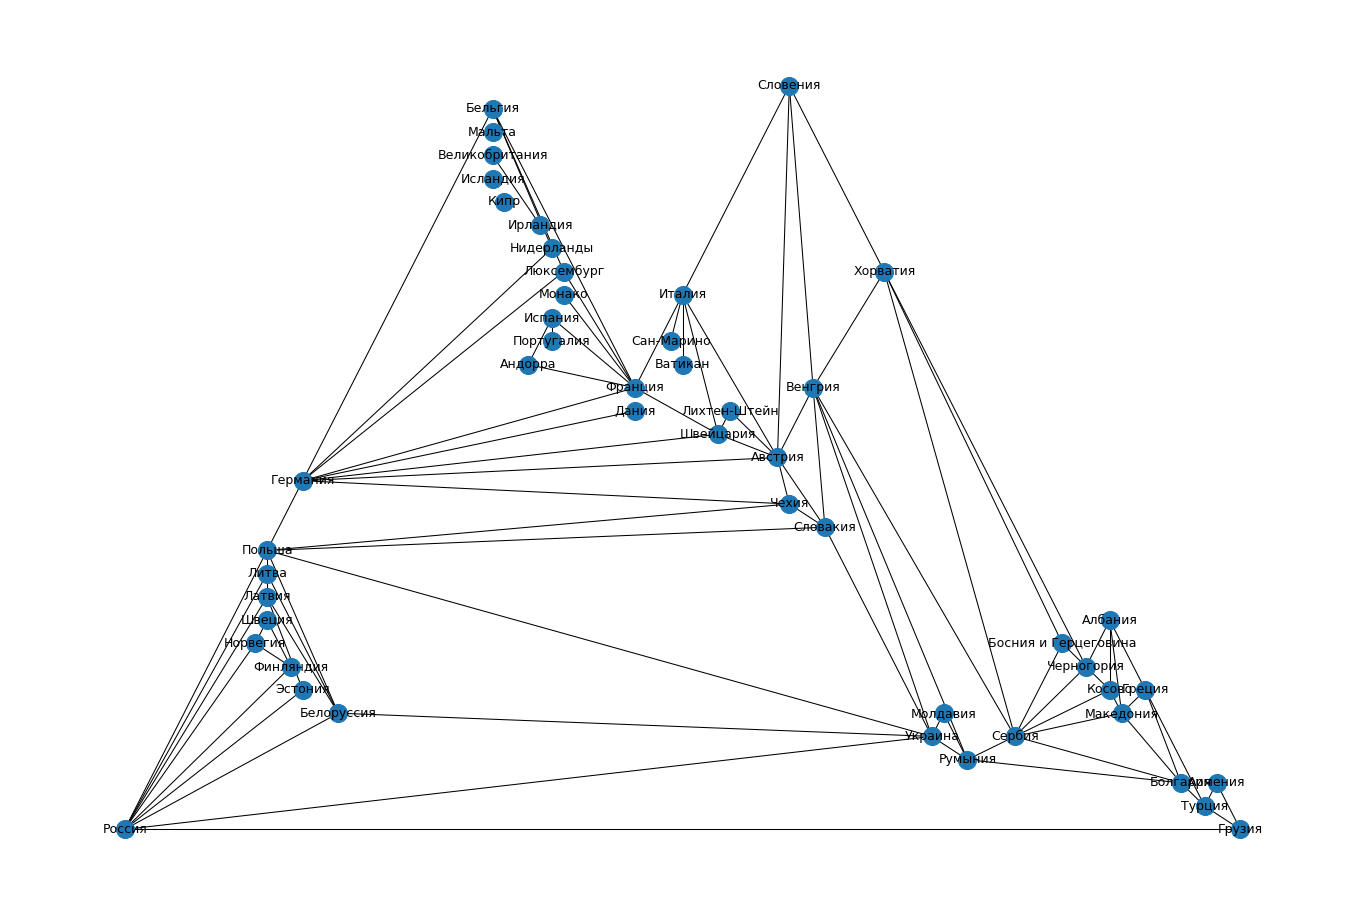

In [3]:
plt.figure(figsize=(18, 12), dpi=75)
nx.draw_planar(G, with_labels=True)

* (b) Find |V|, |E|, δ(G), Δ(G), rad(G), diam(G), girth(G), center(G), κ(G), λ(G).

Для начала создадим новый граф g, куда запишем все вершины наибольшей компоненты связности начального графа. С помощью встроенных функций найдём нужные параметры графа. κ(G) = 1 так как при удалении, Германии Дания будет образовывать отдельную компаненту связности. Аналогично λ(G) = 1, так как при удалении ребра между Данией и Германией граф перестанет быть связным.

In [4]:
g = nx.Graph()
connectivity_component = list(nx.components.connected_components(G))[0]
for node in filter(lambda x: x in connectivity_component, G.nodes()):
    g.add_node(node)
for node in filter(lambda x: x in connectivity_component, G.nodes()):
    for next_node in graph[node]:
        g.add_edge(node, next_node)

names = "|V|, |E|, δ(G), Δ(G), rad(G), diam(G), girth(G), center(G), κ(G), λ(G)".split(', ')
values = [len(nx.nodes(g)), 
          len(nx.edges(g)), 
          min(g.degree(), key=lambda x: x[1])[1], 
          max(g.degree(), key=lambda x: x[1])[1], 
          nx.radius(g), 
          nx.diameter(g), 
          3, 
          set(nx.center(g)), 
          1, 
          1]

for name, value in zip(names, values):
    print(f"{name} = \t{value}")

|V| = 	44
|E| = 	91
δ(G) = 	1
Δ(G) = 	9
rad(G) = 	5
diam(G) = 	8
girth(G) = 	3
center(G) = 	{'Россия', 'Швейцария', 'Словения', 'Австрия', 'Польша', 'Литва', 'Чехия', 'Словакия', 'Хорватия', 'Белоруссия', 'Германия', 'Венгрия', 'Украина'}
κ(G) = 	1
λ(G) = 	1


* (c) Find the minimum vertex coloring Z : V → N of G.

Напишем функцию, которая проверяет можно ли раскрасить вершины в count_of_colors цветов по алгоритму "Трясти мешок с шестерёнками, пока не получатся швейцарские часы". Получается, что минимальное найденное число вершин - 4. То что 4 - минимальное легко доказывается примерами клик из 3 вершин (Россия - Польша - Белоруссия).

In [5]:
color_values = dict()

def clear_colors():
    global color_values
    for node in g.nodes():
        color_values[node] = None

def get_neighbors(node: str) -> set:
    global color_values
    """
    :param node: Вершина
    :return: Множество цветов, в которые окрашены соседи
    """
    neighbors_colors = set()
    for neighbor in nx.neighbors(g, node):
        if color_values[neighbor] is not None:
            neighbors_colors.add(color_values[neighbor])
    return neighbors_colors
    
def coloring(node: str) -> bool:
    global color_values, colors
    """
    :param node: Вершина
    :return: Можно ли покрасить граф в цвета из global colors
    """
    if color_values[node]:
        return True
    free_colors = colors - get_neighbors(node)
    if not len(free_colors):
        return False
    color_values[node] = choice(list(free_colors))
    return all([coloring(neighbor) for neighbor in nx.neighbors(g, node)])

for count_of_colors in range(2, len(nx.nodes(g)) + 1):
    success = False
    for trying in range(10000):
        start = choice(list(g.nodes()))
        clear_colors()
        colors = set(range(count_of_colors))
        if coloring(start):
            success = True
            print(f"Minimum vertex coloring is {count_of_colors}")
            break
    if success:
        break

Minimum vertex coloring is 4


In [6]:
int_to_color = ['blue', 'red', 'purple', 'orange']
for node in g.nodes():
    color_values[node] = int_to_color[color_values[node]]

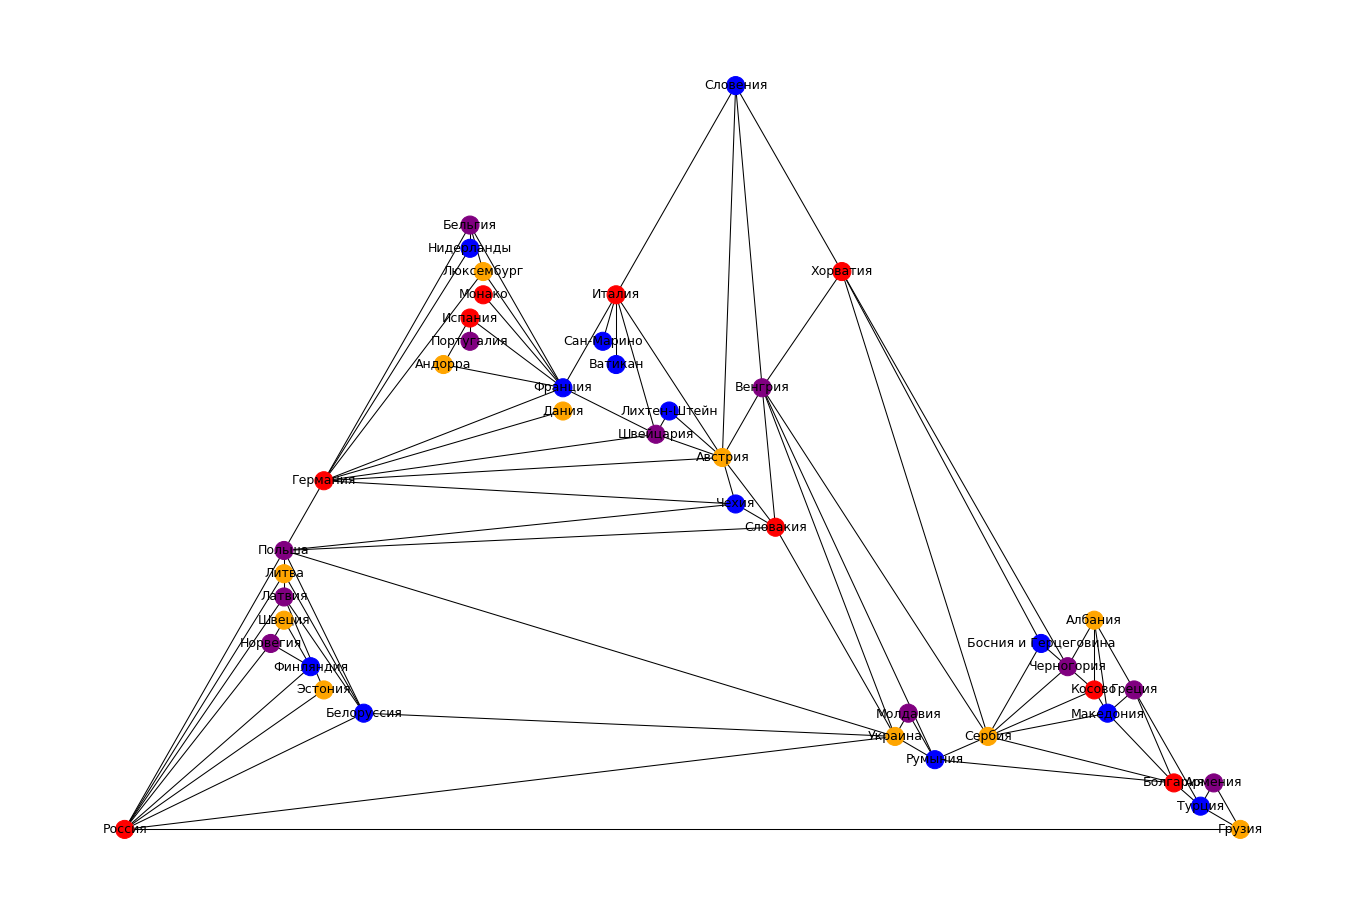

In [7]:
plt.figure(figsize=(18, 12), dpi=75)
nx.draw_planar(g, with_labels=True, node_color=color_values.values())

* (d) Find the minimum edge coloring X : E → N of G.

Переопределим методы словаря, связанные с взятием по ключу, так как networkx выдаёт вершины ребра в случайном порядке.

In [8]:
class dict(dict):
    def __getitem__(self, key):
        if key not in self.keys():
            key = (key[1], key[0])
        return super().__getitem__(key)
    
    def __setitem__(self, key, value):
        if key not in self.keys():
            key = (key[1], key[0])
        super().__setitem__(key, value)

Тоже самое, что с вершинами, но с рёбрами.

In [9]:
color_values = dict()

def clear_colors():
    global color_values
    for edge in g.edges():
        color_values[edge] = None

def get_neighbors(edge: str) -> set:
    global color_values
    """
    :param node: Ребро
    :return: Множество цветов, в которые окрашены смежные ребра
    """
    neighbors_colors = set()
    for neighbor in g.edges(edge):
        if color_values[neighbor] is not None:
            neighbors_colors.add(color_values[neighbor])
    return neighbors_colors
    
def coloring(edge: str) -> bool:
    global color_values, colors
    """
    :param node: Ребро
    :return: Можно ли покрасить граф в цвета из global colors
    """
    if color_values[edge]:
        return True
    free_colors = colors - get_neighbors(edge)
    if not len(free_colors):
        return False
    color_values[edge] = choice(list(free_colors))
    return all([coloring(neighbor) for neighbor in g.edges(edge)])

for count_of_colors in range(8, len(nx.nodes(g)) + 1):
    success = False
    for trying in range(1000):
        start = choice(list(g.edges()))
        clear_colors()
        colors = set(range(count_of_colors))
        if coloring(start):
            success = True
            print(f"Minimum edge coloring is {count_of_colors}")
            break
    if success:
        break

Minimum edge coloring is 10


In [10]:
int_to_color = ['blue', 'red', 'purple', 'orange', 'pink', 'khaki', 'darkgrey', 'cyan', 'palegreen', 'olivedrab']
for edge in g.edges():
    color_values[edge] = int_to_color[color_values[edge]]

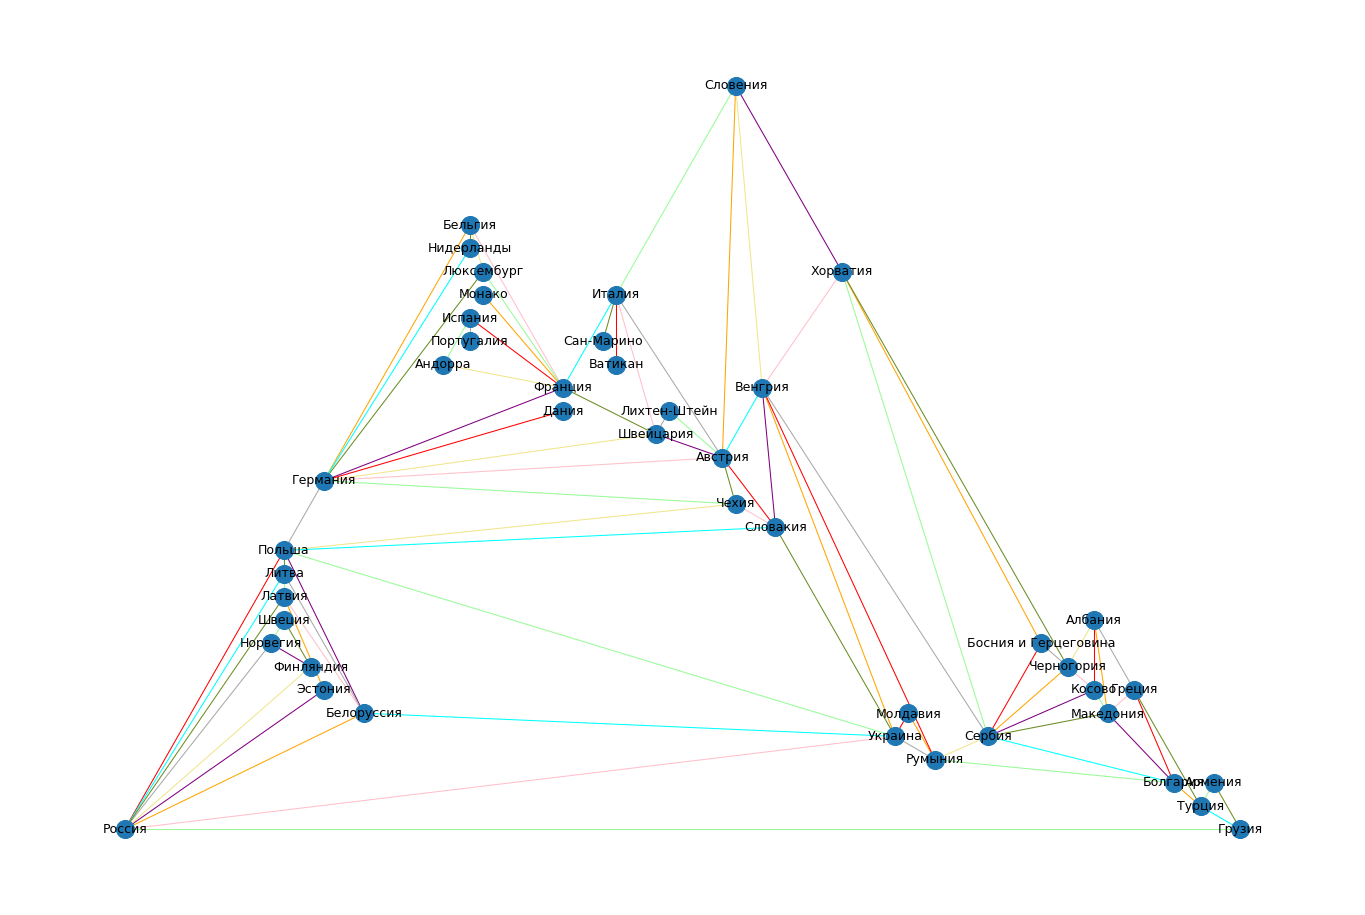

In [11]:
plt.figure(figsize=(18, 12), dpi=75)
nx.draw_planar(g, with_labels=True, edge_color=color_values.values())

* (e) Find the maximum clique Q ⊆ V of G.

Кастомный алгоритм поиска максимальной клики:

In [12]:
def add_one_more_node(cur_clique: list) -> set:
    """
    Ищет вершину, при добавлении которой в cur_set, множество останется clique
    :param cur_set: текущая максимальная clique
    :return: множество подходящих вершин для расщирения
    """
    if len(cur_clique) == 0:
        return g.nodes()
    new_nodes = set()
    for node in nx.neighbors(g, cur_clique[0]):
        if all([node in nx.neighbors(g, cur_node) for cur_node in cur_clique[1:]]):
            new_nodes.add(node)
    return new_nodes

def find_maximum_clique(cur_clique: list) -> list:
    """
    :param cur_clique: текущая максимальная clique
    :raturn: максимальная найденная clique
    """
    new_nodes = add_one_more_node(cur_clique)
    if not new_nodes:
        return cur_clique
    cur_max = []
    for node in new_nodes:
        new_clique = find_maximum_clique(cur_clique + [node])
        if len(new_clique) > len(cur_max):
            cur_max = new_clique[:]
    return cur_max

In [13]:
print(find_maximum_clique([]))

['Россия', 'Польша', 'Литва', 'Белоруссия']


**Следущие 5 заданий выполняются с использованием встроенных в networkx функций**

* (f) Find the maximum stable set S ⊆ V of G.

In [14]:
nx.maximal_independent_set(g)

['Швейцария',
 'Испания',
 'Сербия',
 'Эстония',
 'Молдавия',
 'Армения',
 'Нидерланды',
 'Люксембург',
 'Дания',
 'Словения',
 'Норвегия',
 'Белоруссия',
 'Словакия',
 'Греция',
 'Ватикан',
 'Сан-Марино',
 'Монако']

* (g) Find the maximum matching M ⊆ E of G.

In [15]:
nx.matching.maximal_matching(g)

{('Андорра', 'Испания'),
 ('Белоруссия', 'Польша'),
 ('Босния и Герцеговина', 'Хорватия'),
 ('Венгрия', 'Словения'),
 ('Греция', 'Албания'),
 ('Италия', 'Ватикан'),
 ('Латвия', 'Литва'),
 ('Люксембург', 'Франция'),
 ('Македония', 'Сербия'),
 ('Нидерланды', 'Бельгия'),
 ('Норвегия', 'Швеция'),
 ('Россия', 'Эстония'),
 ('Румыния', 'Болгария'),
 ('Словакия', 'Австрия'),
 ('Турция', 'Армения'),
 ('Украина', 'Молдавия'),
 ('Черногория', 'Косово'),
 ('Чехия', 'Германия'),
 ('Швейцария', 'Лихтен-Штейн')}

* (h) Find the minimum vertex cover R ⊆ V of G.

In [16]:
approximation.vertex_cover.min_weighted_vertex_cover(g)

{'Австрия',
 'Албания',
 'Андорра',
 'Армения',
 'Белоруссия',
 'Бельгия',
 'Болгария',
 'Босния и Герцеговина',
 'Венгрия',
 'Германия',
 'Греция',
 'Испания',
 'Италия',
 'Латвия',
 'Литва',
 'Люксембург',
 'Македония',
 'Молдавия',
 'Нидерланды',
 'Норвегия',
 'Польша',
 'Россия',
 'Румыния',
 'Сербия',
 'Словакия',
 'Словения',
 'Турция',
 'Украина',
 'Франция',
 'Хорватия',
 'Черногория',
 'Чехия',
 'Швейцария',
 'Швеция',
 'Эстония'}

* (i) Find the minimum edge cover F ⊆ E of G.

In [17]:
nx.min_edge_cover(g)

{('Австрия', 'Венгрия'),
 ('Андорра', 'Франция'),
 ('Ватикан', 'Италия'),
 ('Германия', 'Дания'),
 ('Германия', 'Нидерланды'),
 ('Грузия', 'Армения'),
 ('Дания', 'Германия'),
 ('Италия', 'Сан-Марино'),
 ('Косово', 'Албания'),
 ('Литва', 'Латвия'),
 ('Лихтен-Штейн', 'Швейцария'),
 ('Люксембург', 'Бельгия'),
 ('Македония', 'Греция'),
 ('Монако', 'Франция'),
 ('Польша', 'Белоруссия'),
 ('Португалия', 'Испания'),
 ('Россия', 'Финляндия'),
 ('Россия', 'Эстония'),
 ('Сан-Марино', 'Италия'),
 ('Сербия', 'Румыния'),
 ('Словения', 'Хорватия'),
 ('Турция', 'Болгария'),
 ('Украина', 'Молдавия'),
 ('Финляндия', 'Россия'),
 ('Франция', 'Монако'),
 ('Черногория', 'Босния и Герцеговина'),
 ('Чехия', 'Словакия'),
 ('Швеция', 'Норвегия')}

* (j) Find the shortest closed walk W that visits every vertex of G.

In [18]:
tsp = nx.approximation.traveling_salesman_problem
tsp(g)
path = tsp(g, cycle=True)
print(path)

['Россия', 'Грузия', 'Армения', 'Турция', 'Болгария', 'Македония', 'Сербия', 'Босния и Герцеговина', 'Черногория', 'Албания', 'Косово', 'Албания', 'Греция', 'Болгария', 'Румыния', 'Сербия', 'Хорватия', 'Словения', 'Италия', 'Ватикан', 'Италия', 'Сан-Марино', 'Италия', 'Австрия', 'Лихтен-Штейн', 'Швейцария', 'Австрия', 'Венгрия', 'Украина', 'Молдавия', 'Украина', 'Польша', 'Германия', 'Дания', 'Германия', 'Франция', 'Испания', 'Португалия', 'Испания', 'Андорра', 'Франция', 'Монако', 'Франция', 'Люксембург', 'Бельгия', 'Нидерланды', 'Германия', 'Польша', 'Чехия', 'Словакия', 'Польша', 'Литва', 'Белоруссия', 'Латвия', 'Эстония', 'Россия', 'Финляндия', 'Швеция', 'Норвегия', 'Россия']


* (k) Find the shortest closed walk U that visits every edge of G.

Вот коротчайший путь, обходящий все ребра. Я нашел его руками, записывая новые рёбра и отмечая их на графе красным. Доказать, что он коротчайший (мне так кажется, я старался максимизировать число циклов), можно перебрав все пути (задача вроде NP полная)

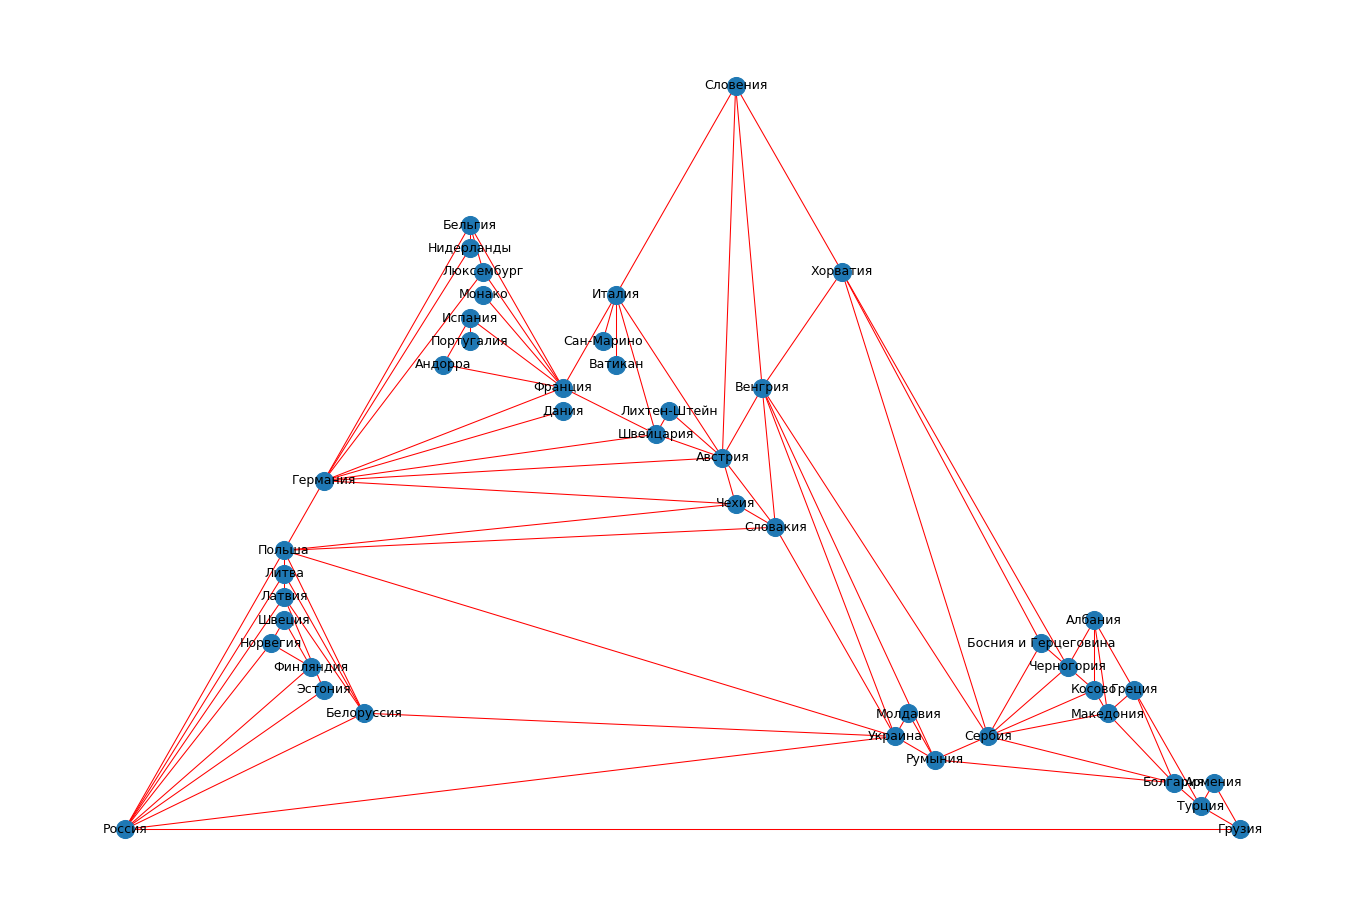

In [19]:
a = ["Дания", "Германия", "Бельгия", "Нидерланды", "Германия",
    "Люксембург", "Бельгия", "Франция", "Люксембург", "Германия", "Франция", "Монако", "Франция", "Испания",
    "Португалия", "Испания", "Андорра", "Франция", "Италия", "Швейцария", "Франция", "Швейцария",
    "Германия", "Австрия", "Чехия", "Словакия", "Австрия", "Швейцария", "Лихтен-Штейн", "Австрия", "Италия",
    "Сан-Марино", "Италия", "Ватикан", "Италия", "Словения", "Австрия", "Венгрия", "Словения", "Хорватия",
    "Венгрия", "Словакия", "Украина", "Венгрия", "Румыния", "Украина", "Молдавия", "Румыния", "Болгария", "Сербия",
    "Венгрия", "Хорватия", "Сербия", "Босния и Герцеговина", "Хорватия", "Черногория", "Босния и Герцеговина",
    "Черногория", "Сербия", "Косово", "Черногория", "Албания", "Косово", "Македония", "Албания", "Греция",
    "Македония", "Сербия", "Румыния", "Болгария", "Македония", "Греция", "Болгария", "Турция", "Греция", "Турция",
    "Армения", "Грузия", "Турция", "Грузия", "Россия", "Белоруссия", "Украина", "Россия", "Латвия", "Эстония", "Россия",
    "Финляндия", "Швеция", "Норвегия", "Финляндия", "Норвегия", "Россия", "Литва", "Латвия", "Белоруссия", "Литва",
    "Польша", "Россия", "Белоруссия", "Польша", "Украина", "Словакия", "Польша", "Чехия", "Германия", "Польша", "Германия",
    "Дания"]

for edge in g.edges():
    color_values[edge] = 'blue'
    
for i in range(len(a) - 1):
    color_values[(a[i], a[i + 1])] = 'red'
plt.figure(figsize=(18, 12), dpi=75)
nx.draw_planar(g, with_labels=True, edge_color=color_values.values())

* (l) Find all biconnected components (blocks) and draw the block-cut tree of G*.

Нашел все блоки встроенной функцией, нашел те, у которых одинаковые вершины, построил block-cut tree.

In [20]:
list(nx.components.biconnected_components(g))

[{'Испания', 'Португалия'},
 {'Андорра', 'Испания', 'Франция'},
 {'Монако', 'Франция'},
 {'Ватикан', 'Италия'},
 {'Италия', 'Сан-Марино'},
 {'Германия', 'Дания'},
 {'Австрия',
  'Албания',
  'Армения',
  'Белоруссия',
  'Бельгия',
  'Болгария',
  'Босния и Герцеговина',
  'Венгрия',
  'Германия',
  'Греция',
  'Грузия',
  'Италия',
  'Косово',
  'Латвия',
  'Литва',
  'Лихтен-Штейн',
  'Люксембург',
  'Македония',
  'Молдавия',
  'Нидерланды',
  'Польша',
  'Россия',
  'Румыния',
  'Сербия',
  'Словакия',
  'Словения',
  'Турция',
  'Украина',
  'Франция',
  'Хорватия',
  'Черногория',
  'Чехия',
  'Швейцария',
  'Эстония'},
 {'Норвегия', 'Россия', 'Финляндия', 'Швеция'}]

In [21]:
blocks = list(nx.components.biconnected_components(g))
bc_tree = nx.Graph()
for i in range(len(blocks)):
    bc_tree.add_node(f"Block {i}")
for i in range(len(blocks)):
    for j in range(i + 1, len(blocks)):
        for k in blocks[i]:
            if k in blocks[j]:
                bc_tree.add_node(k)
                bc_tree.add_edge(k, "Block " + str(i))
                bc_tree.add_edge(k, "Block " + str(j))

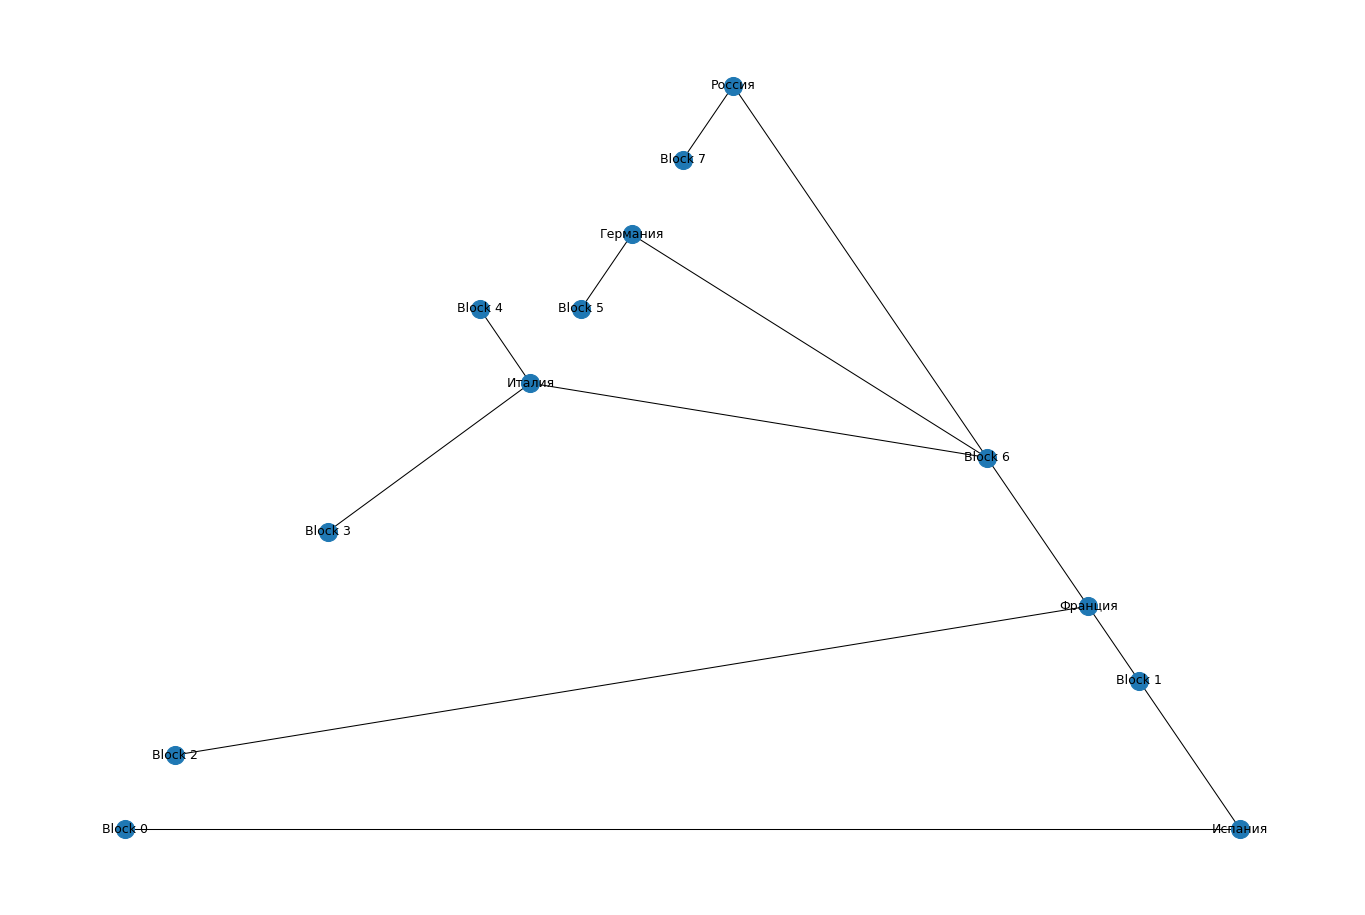

In [22]:
plt.figure(figsize=(18, 12), dpi=75)
nx.draw_planar(bc_tree, with_labels=True)

* (m)Find all 2-edge-connected components of G*.

Сила в фреймворках......

In [23]:
list(nx.components.biconnected_component_edges(g))

[[('Испания', 'Португалия')],
 [('Франция', 'Андорра'), ('Андорра', 'Испания'), ('Испания', 'Франция')],
 [('Франция', 'Монако')],
 [('Италия', 'Ватикан')],
 [('Италия', 'Сан-Марино')],
 [('Германия', 'Дания')],
 [('Россия', 'Эстония'),
  ('Эстония', 'Латвия'),
  ('Латвия', 'Россия'),
  ('Латвия', 'Литва'),
  ('Литва', 'Россия'),
  ('Литва', 'Белоруссия'),
  ('Белоруссия', 'Россия'),
  ('Белоруссия', 'Латвия'),
  ('Белоруссия', 'Польша'),
  ('Польша', 'Россия'),
  ('Польша', 'Литва'),
  ('Польша', 'Чехия'),
  ('Чехия', 'Словакия'),
  ('Словакия', 'Польша'),
  ('Словакия', 'Украина'),
  ('Украина', 'Россия'),
  ('Украина', 'Белоруссия'),
  ('Украина', 'Польша'),
  ('Украина', 'Молдавия'),
  ('Молдавия', 'Румыния'),
  ('Румыния', 'Украина'),
  ('Румыния', 'Болгария'),
  ('Болгария', 'Сербия'),
  ('Сербия', 'Румыния'),
  ('Сербия', 'Македония'),
  ('Македония', 'Болгария'),
  ('Македония', 'Греция'),
  ('Греция', 'Болгария'),
  ('Греция', 'Турция'),
  ('Турция', 'Болгария'),
  ('Турция', 

* (n) Construct an SPQR tree of the largest biconnected component of G.

Нашел самую большую компоненту двойной связности, перенёс её в онлайн калькулятор SPQR деревьев и построил то что нужно

In [24]:
largest_c = max(nx.components.biconnected_components(g), key=lambda x: len(x))

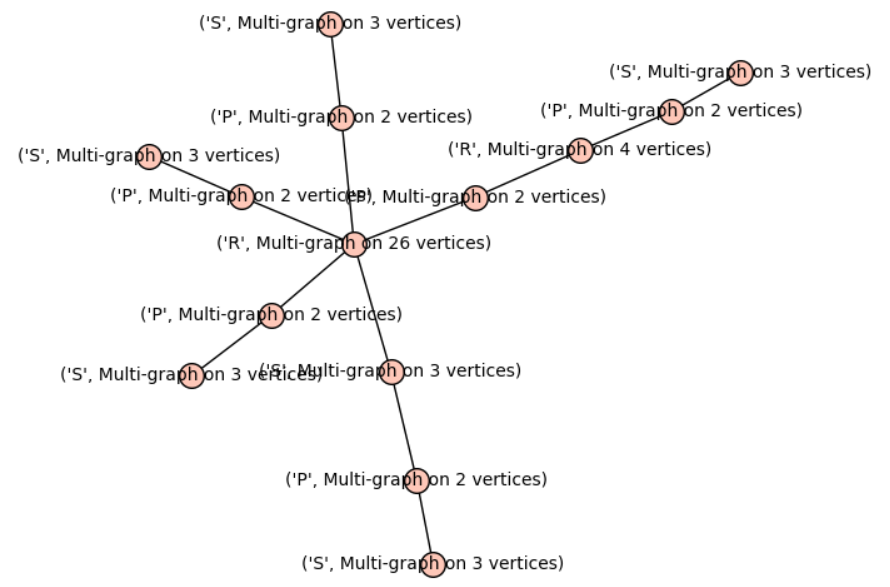

* (o) Add the weight functionw : E → R denoting the distance between capitals. Find the minimum
(w.r.t. the total weight of edges) spanning tree T for the largest connected component of the
weighted Europe graph $G^∗_w$ = (V , E,w).

На kaggle нашел [датасет](https://www.kaggle.com/datasets/nikitagrec/world-capitals-gps) gps координат столиц. С помощью Яндекс переводчика создал словарь переводы названий стран с русского на английский. Взял из интернета функцию перевода gps координат двух точек в расстояние между ними (я вообще не географ). Дальше все очевидно.

In [25]:
df = pd.read_csv("concap.csv")

In [26]:
df.head()

,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
0,Somaliland,Hargeisa,9.550000,44.050000,NaN,Africa
1,South Georgia and South Sandwich Islands,King Edward Point,-54.283333,-36.500000,GS,Antarctica
2,French Southern and Antarctic Lands,Port-aux-Français,-49.350000,70.216667,TF,Antarctica
3,Palestine,Jerusalem,31.766667,35.233333,PS,Asia
4,Aland Islands,Mariehamn,60.116667,19.900000,AX,Europe


In [27]:
s = {'Россия': 'Russia',
 'Норвегия': 'Norway',
 'Финляндия': 'Finland',
 'Швеция': 'Sweden',
 'Эстония': 'Estonia',
 'Латвия': 'Latvia',
 'Белоруссия': 'Belarus',
 'Литва': 'Lithuania',
 'Польша': 'Poland',
 'Украина': 'Ukraine',
 'Молдавия': 'Moldova',
 'Румыния': 'Romania',
 'Болгария': 'Bulgaria',
 'Турция': 'Turkey',
 'Греция': 'Greece',
 'Албания': 'Albania',
 'Македония': 'Macedonia',
 'Сербия': 'Serbia',
 'Босния и Герцеговина': 'Bosnia and Herzegovina',
 'Хорватия': 'Croatia',
 'Венгрия': 'Hungary',
 'Словакия': 'Slovakia',
 'Словения': 'Slovenia',
 'Австрия': 'Austria',
 'Чехия': 'Czech Republic',
 'Германия': 'Germany',
 'Дания': 'Denmark',
 'Нидерланды': 'Netherlands',
 'Бельгия': 'Belgium',
 'Люксембург': 'Luxembourg',
 'Франция': 'France',
 'Швейцария': 'Switzerland',
 'Италия': 'Italy',
 'Сан-Марино': 'San Marino',
 'Ватикан': 'Vatican City',
 'Лихтен-Штейн': 'Liechtenstein',
 'Монако': 'Monaco',
 'Андорра': 'Andorra',
 'Испания': 'Spain',
 'Португалия': 'Portugal',
 'Армения': 'Armenia',
 'Грузия': 'Georgia',
 'Черногория': 'Montenegro',
 'Косово': 'Kosovo'}

In [28]:
def dist(c1, c2):  
    from math import pi, cos, sin, acos, atan2
    c1, c2 = s[c1], s[c2]
    lat1 = df[df.CountryName == c1].CapitalLatitude.values[0] / 180 * pi
    lat2 = df[df.CountryName == c2].CapitalLatitude.values[0] / 180 * pi
    lon1 = df[df.CountryName == c1].CapitalLongitude.values[0] / 180 * pi
    lon2 = df[df.CountryName == c2].CapitalLongitude.values[0] / 180 * pi
    delta_lat = lat2 - lat1
    delta_lon = lon2 - lon1
    a = sin(delta_lat / 2)**2 + cos(lat1) * cos(lat2) * sin(delta_lon / 2)**2
    c = 2 * atan2(a**0.5, (1 - a)**0.5)
    return round(c * 6372.797)

In [29]:
W = nx.Graph()
W.add_edges_from([(i[0], i[1], {'weight': dist(i[0], i[1])}) for i in g.edges()])

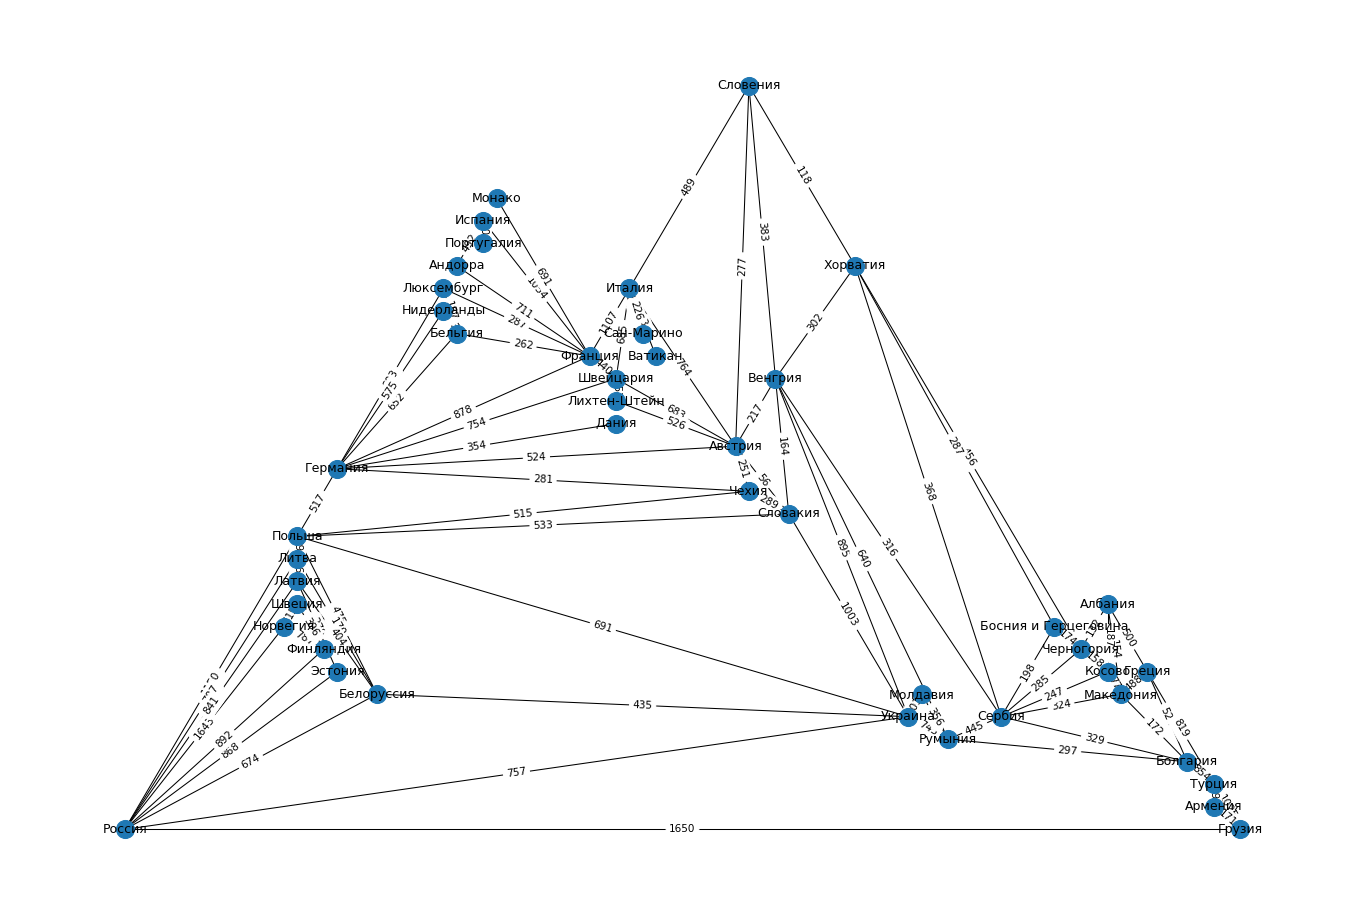

In [30]:
plt.figure(figsize=(18, 12), dpi=75) 
nx.draw_planar(W, with_labels = True) 
labels = nx.get_edge_attributes(W, 'weight') 
nx.draw_networkx_edge_labels(W, pos=nx.planar_layout(W), edge_labels=labels) 
plt.show()

In [31]:
T = nx.algorithms.minimum_spanning_tree(W)

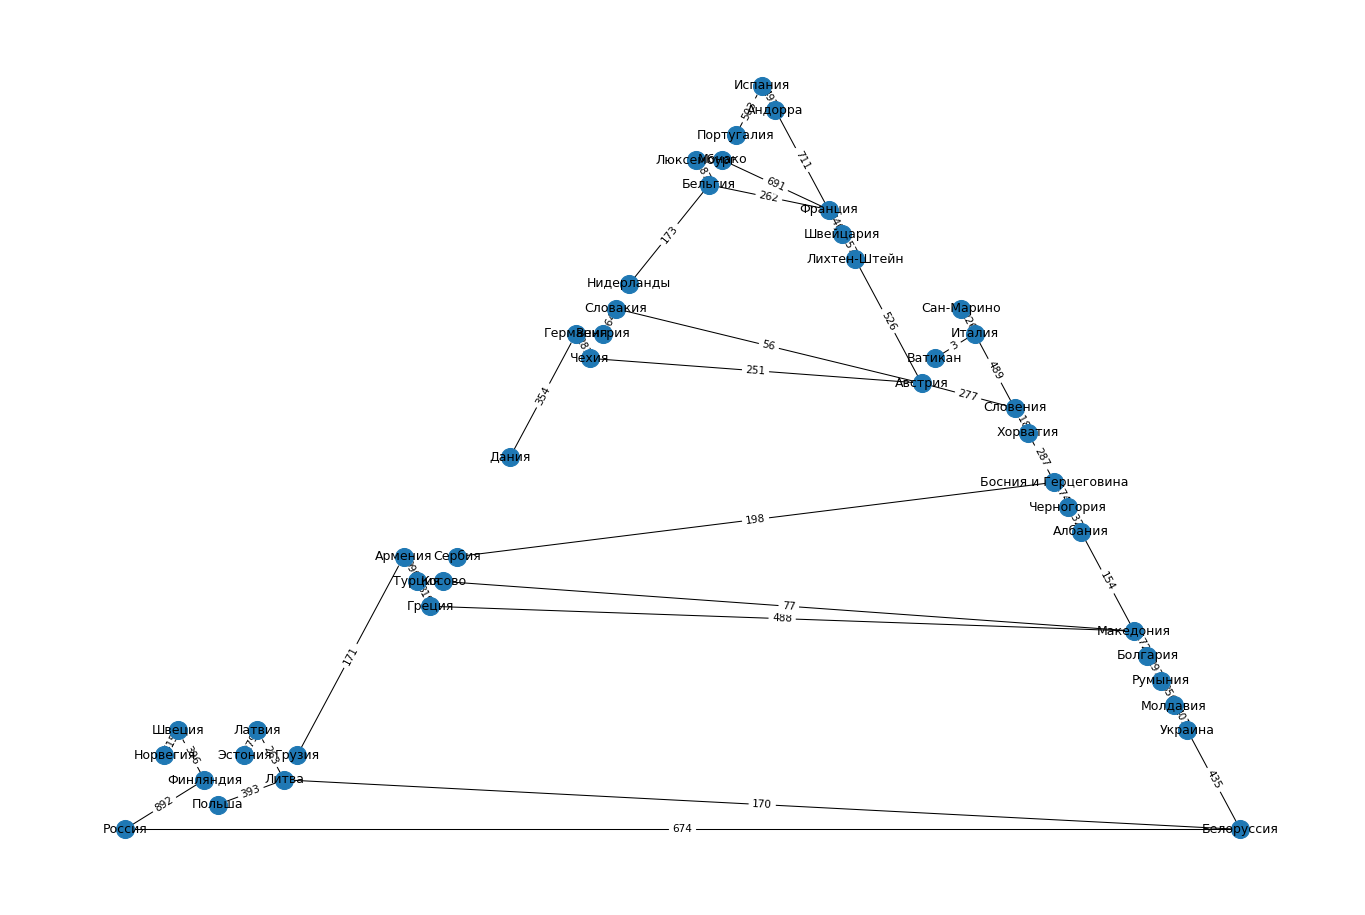

In [32]:
plt.figure(figsize=(18, 12), dpi=75) 
nx.draw_planar(T, with_labels = True) 
labels = nx.get_edge_attributes(T, 'weight') 
nx.draw_networkx_edge_labels(T, pos=nx.planar_layout(T), edge_labels=labels) 
plt.show()

* (p) Find centroid(T) (w.r.t. the edge weight function w).

[FRAMEWORKS is all you need!](https://arxiv.org/abs/1706.03762) (шутка)

In [33]:
print(*nx.barycenter(T))

Босния и Герцеговина


* (q) Construct the Prufer code for T.

Сначала перевёл все названия стран в числа (чем меньше название по алфавиту тем меньше число), networkx видимо не умеет сравнивать строки, странно. Потом nx.to_prufer_sequence:)

In [34]:
names2digits = {}
k = 0
for i in sorted(T.nodes()):
    names2digits[i] = k
    k += 1
weights = nx.get_edge_attributes(T, 'weight')
D = nx.Graph()
edges_from = []
for edge in T.edges():
    edges_from.append((names2digits[edge[0]], names2digits[edge[1]], {'weight': weights[edge]}))
D.add_edges_from(edges_from)

In [35]:
print(nx.to_prufer_sequence(D))

[15, 32, 3, 34, 10, 40, 21, 5, 37, 5, 37, 42, 18, 14, 2, 37, 15, 33, 7, 0, 11, 21, 41, 0, 19, 0, 33, 38, 7, 39, 1, 21, 6, 29, 22, 35, 4, 36, 28, 4, 18, 17]


**2. Prove rigorously the following theorems:**

**Theorem 1** (Triangle Ineqality). For any connected graph G = ⟨V , E⟩:
∀x, y, z ∈ V : dist(x, y) + dist(y, z) ≥ dist(x, z)

Докажем теорему от противного, пусть $\exists x, y, z ∈ V: dist(x, y) + dist(y, z) < dist(x, z)$. Но, так как путь из x в y и путь из y в z являются и путём из x в z, то $\exists$ путь из x в z, длинны меньше чем dist(x, z), противоречие.

**Theorem 2** (Tree). A connected graph G = ⟨V, E⟩ is a tree (i.e. acyclic graph) if |E| = |V| − 1.

Докажем теорему индукцией. Если граф состоит из 1 единственной вершины, и |E| = 0, |V| = 1 $\to 0 = 1 - 1$, то тот факт, что он является деревом очевиден. Далее: если у нас есть граф, в котором |E| = |V| − 1 и который является деревом, то при добавлении еще одного ребра либо не добавляется ещё одна вершина, тогда |E| + 1 ≠ |V| − 1. Либо добавляется еще одна вершина, тогда либо ребро ведёт не в неё и граф больше не будет связным, либо ребро ведёт в неё, что исключает возможность цикла. Тогда при условии |E| + 1 = |V| + 1 − 1 G также будет деревом.

**Theorem 3** (Whitney). For any graph G: κ(G) ≤ λ(G) ≤ δ(G).

Докажем сначала то, что κ(G) ≤ λ(G). Если удалить одну из соседних вершин у каждого из λ рёбер, то за меньшее или равное, чем λ число вершин мы делаем граф несвязным, то есть κ(G) ≤ λ(G).

Докажем теперь, что λ(G) ≤ δ(G). Если взять вершину с минимальной степенью и удалить все её ребра, то граф перестанет быть связным, то есть λ(G) ≤ δ(G).

**Theorem 4** (Chartrand). For a connected graph G: if δ(G) ≥ ⌊|V|/2⌋, then λ(G) = δ(G).

Граф G перестанет быть связным, если в нём будут хотя бы 2 разных компоненты связности. Назовём их A и B. Пусть после удаления какого-то числа рёбер G разделится на компоненты A и B. Пусть в компоненте A будет a вершин, а в компоненте B будет b вершин. (a + b) = |V|, a > 0, b > 0.  В сумме в графе G есть как минимум ⌊(a + b)/2⌋ * (a + b) рёбер. Из них могут остатться только ребра, между вершинами из одной компоненты. Между вершинами A можно построить a * (a - 1) / 2 рёбер, а между вершинами из B всего b * (b - 1) рёбер. Тогда удалить нужно будет как минимум $⌊(a + b)/2⌋ * (a + b) - a * (a - 1) / 2 - b * (b - 1) / 2$ рёбер.

$(a + b)^2 / 2 - (a^2 - a) / 2 - (b^2 - b) / 2 = (a^2 + 2ab + b^2 - a^2 + a - b^2 + b) / 2 = (2ab - a - b) / 2 =$

Минимум достигается при наибольшей разнице между a и b $\to$ a = 1, b = |V| - 1.

$= |V| / 2.$ То есть λ(G) = |V|/2 = δ(G)

**Theorem 5** (Menger). For any pair of non-adjacent vertices u and v in an undirected graph,
the size of the minimum vertex cut is equal to the maximum number of pairwise internally
vertex-disjoint paths from u to v.

Очевидно, что если k вершин разделяют s и t, то сущесвует не более k непересекающихся простых (s−t) цепей. Теперь покажем, что если k вершин графа разделяют s и t, то существует k непересекающихся простых (s−t) цепей. Для k=1 это очевидно. Пусть, для некоторого k>1 это неверно. Возьмем h — наименьшее такое k и F — граф с наименьшим числом вершин, для которого при выбранном h теорема не верна. Будем удалять из F ребра, пока не получим G такой, что в G s и t разделяют h вершин, а в G−x h−1 вершина, где x— произвольное ребро графа G.

Из определения G следует, что для всякого его ребра x существует множество S(x) из h−1 вершин, которое в G−x разделяет s и t. Далее, граф G−S(x) содержит по крайней мере одну (s−t) цепь, так как граф G имеет h вершин, разделяющих s и t в G. Каждая такая (s−t) цепь должна содержать ребро x=uv, поскольку она не является цепью в G−x. Поэтому u,v∉S(x), и если u≠s,t то S(x)∪u разделяет s и t в G.

**Лемма 1**
В графе G нет вершин, смежных одновременно с s и t

Если в G есть вершина w, смежная как с s, так и с t, то в графе G−w для разделения s и t требуется h−1 непересекающихся (s−t) цепей. Добавляя w, получаем в графе G h непересекающихся (s−t) цепей, что противоречит предположению о графе F

**Лемма 2**
Любой набор W, содержащий h вершин и разделяющий s и t является смежным с s или t.

Пусть W — произвольный набор h вершин, разделяющих s и t в G.

Цепь, соединяющую s с некоторой вершиной wi∈W и не содержащую других вершин из W будем называть (s−W) цепью. Аналогично назовем (W−t) цепь. Обозначим наборы всех (s−W) и (W−t) цепей Ps и Pt соответственно. Тогда каждая (s−t) цепь начинается с элемента из Ps и заканчивается элементом из Pt, поскольку любая цепь содержит вершину из W. Общие вершины цепей из Ps и Pt принадлежат набору W, так как по крайней мере одна цепь из каждого набора Ps и Pt содержит (любую) вершину wi, и если бы существовала некоторая вершина, не принадлежащая набору W, но содержащаяся сразу и в (s−W) и в (W−t) цепи, то нашлась бы (s−t) цепь, не имеющая вершин из W. Наконец, выполняется либо равенство Ps−W=s, либо равенство Pt−W=t, поскольку в противном случае либо Ps вместе с ребрами {w1t,w2t...}, либо Pt вместе с ребрами {sw1,sw2...} образуют связные графы с меньшим числом вершин, чем у G, в которых s и t не смежны, и, следовательно, в каждом из них имеется h непересекающихся (s−t) цепей. Объединяя (s−W) и (W−t) части этих цепей, образуем в графе G h непересекающихся (s−t) цепей. Мы пришли к противоречию. Утверждение доказано.


Пусть P={s,u1,u2...t} — кратчайшая (s−t) цепь в G, u1u2=x. Заметим, что из леммы (I) u1≠t Образуем множество S(x)={v1,...,vh−1}, разделяющее в G−x вершины s и t. Из леммы (I) следует, что u1t∉G. Используя лемму (II) и беря W=S(x)∪u1, получаем ∀isvi∈G. Таким образом в силу леммы (I) ∀ivit∉G. Однако, если выбрать W=S(x)∪u2, то в силу леммы (II) получим su2∈G, что противоречит выбору P как кратчайшей (s−t) цепи. Из полученного противоречия следует, что графа G, удовлетворяющего указанным условиям не существует, а значит не существует и графа F, для которого теорема не верна.


Доказательство подсмотрено на [вики конспектах](https://neerc.ifmo.ru/wiki/index.php?title=%D0%A2%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0_%D0%9C%D0%B5%D0%BD%D0%B3%D0%B5%D1%80%D0%B0,_%D0%B0%D0%BB%D1%8C%D1%82%D0%B5%D1%80%D0%BD%D0%B0%D1%82%D0%B8%D0%B2%D0%BD%D0%BE%D0%B5_%D0%B4%D0%BE%D0%BA%D0%B0%D0%B7%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D1%81%D1%82%D0%B2%D0%BE)

**Theorem 6** (Harary). Every block of a block graph is a clique.

Согласно [определению](https://en.wikipedia.org/wiki/Block_graph) блочного графа, блочный граф - это граф, в котором каждая двусвязная компонента (блок) - это клика. Истинность теоремы следует из определения блочного графа.